In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.metrics import r2_score
import math

In [2]:
df = pd.read_csv('../../mydata/auto-imports.csv', header=None, na_values='?')
num_map = {'two':2, 'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
             'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df['cylinders'] = df['num-of-cylinders'].map(num_map)
df['doors'] = df['num-of-doors'].map(num_map)

In [3]:
df = df.dropna(subset=['price'])
df = df.reset_index(drop=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cylinders,doors
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4,2.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4,2.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6,2.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4,4.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,4,4.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,4,4.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,6,4.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,6,4.0


In [4]:
df.horsepower=df.horsepower.fillna(df.horsepower.mean())
df.horsepower.unique()

array([111.        , 154.        , 102.        , 115.        ,
       110.        , 140.        , 101.        , 121.        ,
       182.        ,  48.        ,  70.        ,  68.        ,
        88.        , 145.        ,  58.        ,  76.        ,
        60.        ,  86.        , 100.        ,  78.        ,
        90.        , 176.        , 262.        , 135.        ,
        84.        ,  64.        , 120.        ,  72.        ,
       123.        , 155.        , 184.        , 175.        ,
       116.        ,  69.        ,  55.        ,  97.        ,
       152.        , 160.        , 200.        ,  95.        ,
       142.        , 143.        , 207.        , 103.39698492,
        73.        ,  82.        ,  94.        ,  62.        ,
        56.        , 112.        ,  92.        , 161.        ,
       156.        ,  52.        ,  85.        , 114.        ,
       162.        , 134.        , 106.        ])

 
172.2 x - 4598 - fit line
-110339.53555721397 - R2


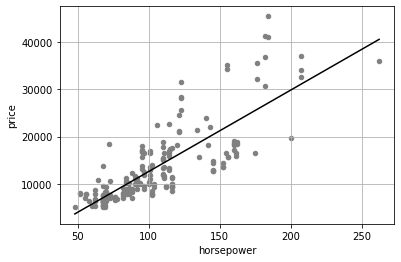

In [5]:
def plot_scatter_with_fitline(dataset, xaxis, yaxis):
    dataset = dataset.sort_values(xaxis)

    z = np.polyfit(dataset[xaxis], dataset[yaxis], 1)
    f = np.poly1d(z)
    print(f"{f} - fit line\n{r2_score(dataset[yaxis], f(dataset[yaxis]))} - R2")

    plt.scatter(x=dataset[xaxis], y=dataset[yaxis], marker='o', s=20, color='grey')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.plot(dataset[xaxis], f(dataset[xaxis]), color='black')
    plt.grid()
    plt.show()

plot_scatter_with_fitline(df, 'horsepower', 'price')